# cctv와 인구분석2
- 전처리 되어진 데이터를 이용
- 각 구별 인구수에 맞는 적정 cctv 대수 추정
- cctv와 인구와의 관계를 산점도로 표현
- 관계데이터를 기반으로 한 대표직선(회귀직선)을 표현
- 각 구별 cctv 대수를 추정하고 추정된 대수와의 차이 계산

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# 한글문제 발생
# matplotlib의 기본폰트에서 한글지원 폰트가 없음
# 패키지의 폰트를 추가하고 사용

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
# 데이터 로드
cctv_res = pd.read_csv('./data/data_result.csv')
cctv_res.head()

,구별,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
0,강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
1,강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
2,강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
3,강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
4,관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


In [7]:
cctv_res.set_index('구별',inplace=True)

# cctv와 인구수 관계 표현
- 소계와 인구수의 산점도
- 소계와 인구수를 활용 대표직선(회귀직선)을 그리기 위한 1차방정식 함수를 구성
- 함수를 이용하여 직선 data 계산

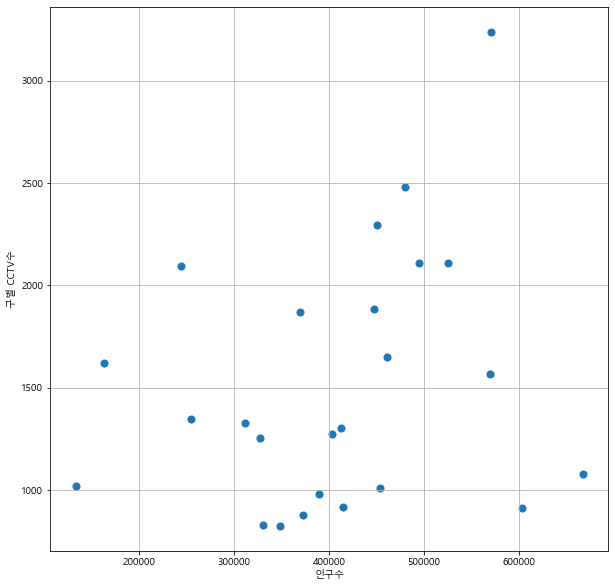

In [8]:
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'],cctv_res['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('구별 CCTV수')
plt.grid()
plt.show()

In [9]:

# 두 개의 데이터의 관계를 대표하는 직선을 그리기 위한 기울기와 절편 계산
# np.polyfit(data1,data2,차수)
poly_fit = np.polyfit(cctv_res.인구수,cctv_res.소계,1)
poly_fit
# ax + b : 1.15151285e-03 * 인구수 + 1.04561312e+03

array([1.15151285e-03, 1.04561312e+03])

In [10]:
# x좌표(인구수 생성)
xs = np.linspace(cctv_res.인구수.min(),cctv_res.인구수.max())

In [11]:
# 1차방정식을 이용
# xs(임의 인구수)에 대으으하는 ys(cctv 대수 계산)
# 방정식 생성 : np.poly1d((기울기,절편))
poly_1d = np.poly1d(poly_fit)

In [12]:
xs

array([133240.        , 144142.91836735, 155045.83673469, 165948.75510204,
       176851.67346939, 187754.59183673, 198657.51020408, 209560.42857143,
       220463.34693878, 231366.26530612, 242269.18367347, 253172.10204082,
       264075.02040816, 274977.93877551, 285880.85714286, 296783.7755102 ,
       307686.69387755, 318589.6122449 , 329492.53061224, 340395.44897959,
       351298.36734694, 362201.28571429, 373104.20408163, 384007.12244898,
       394910.04081633, 405812.95918367, 416715.87755102, 427618.79591837,
       438521.71428571, 449424.63265306, 460327.55102041, 471230.46938776,
       482133.3877551 , 493036.30612245, 503939.2244898 , 514842.14285714,
       525745.06122449, 536647.97959184, 547550.89795918, 558453.81632653,
       569356.73469388, 580259.65306122, 591162.57142857, 602065.48979592,
       612968.40816327, 623871.32653061, 634774.24489796, 645677.16326531,
       656580.08163265, 667483.        ])

In [13]:

poly_1d(133240)

1199.040691242985

In [14]:
ys = poly_1d(xs)

In [15]:
ys

array([1199.04069124, 1211.59554181, 1224.15039238, 1236.70524294,
       1249.26009351, 1261.81494407, 1274.36979464, 1286.92464521,
       1299.47949577, 1312.03434634, 1324.5891969 , 1337.14404747,
       1349.69889804, 1362.2537486 , 1374.80859917, 1387.36344973,
       1399.9183003 , 1412.47315087, 1425.02800143, 1437.582852  ,
       1450.13770256, 1462.69255313, 1475.2474037 , 1487.80225426,
       1500.35710483, 1512.9119554 , 1525.46680596, 1538.02165653,
       1550.57650709, 1563.13135766, 1575.68620823, 1588.24105879,
       1600.79590936, 1613.35075992, 1625.90561049, 1638.46046106,
       1651.01531162, 1663.57016219, 1676.12501275, 1688.67986332,
       1701.23471389, 1713.78956445, 1726.34441502, 1738.89926558,
       1751.45411615, 1764.00896672, 1776.56381728, 1789.11866785,
       1801.67351841, 1814.22836898])

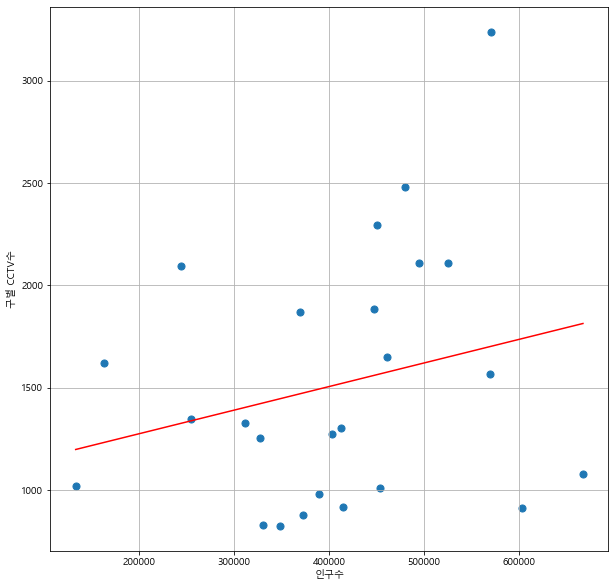

In [16]:
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'],cctv_res['소계'],s=50,label='cctv vs pop')
plt.plot(xs,ys,color='red',label='적정 cctv 대수') # 대표직선(회귀직선) 추가
plt.xlabel('인구수')
plt.ylabel('구별 CCTV수')
plt.grid()
plt.show()

- 인구수가 400,000일 때 적정 cctv 대수는 1500대 정도라는 것을 의미
- 선 근처에 분포하면 적당한 대수를 갖고 있음을 의미
- 선에서 멀어질수록 cctv 대수가 너무 많거나 너무 적은 것을 의미

In [17]:
# 각 구별 적절한 cctv 수를 계산
cctv_res.소계 - poly_1d(cctv_res.인구수)
# 강남구는 1,500대 더 많이 설치
# 강동구, 강북구, 서초구 등은 부족한 상태

구별
강남구     1535.448801
강동구     -557.516742
강북구     -594.833449
강서구     -829.864334
관악구      458.249607
광진구     -596.164747
구로구      322.654216
금천구        8.656680
노원구     -135.266110
도봉구     -622.083467
동대문구     398.907490
동작구     -218.635199
마포구     -514.298949
서대문구    -168.345517
서초구      732.849130
성동구      -77.014584
성북구       74.240065
송파구     -733.228369
양천구      883.686047
영등포구    -232.655524
용산구      769.183989
은평구      493.092747
종로구      385.897559
중구      -176.040691
중랑구     -606.918649
Name: 소계, dtype: float64

In [18]:

# 오차 필드는 cctv가 부족 또는 과한 상태를 표현
cctv_res['오차'] = np.abs(cctv_res.소계 - poly_1d(cctv_res.인구수))

In [19]:
cctv_res.head()

,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율,오차
구별,,,,,,,,,,,,,,
강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,557.516742
강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,594.833449
강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,458.249607


In [20]:

# 계산한 오차 이용해서 내림차순 정렬
df_sort = cctv_res.sort_values(by='오차',ascending=False)
df_sort

,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율,오차
구별,,,,,,,,,,,,,,
강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,1535.448801
양천구,1843,142,30,467,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,883.686047
강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,829.864334
용산구,1368,218,112,398,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,769.183989
송파구,529,21,68,463,1081,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.161952,733.228369
서초구,1406,157,336,398,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,732.849130
도봉구,238,159,42,386,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,622.083467
중랑구,509,121,177,109,916,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.220988,606.918649
광진구,573,78,53,174,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,596.164747


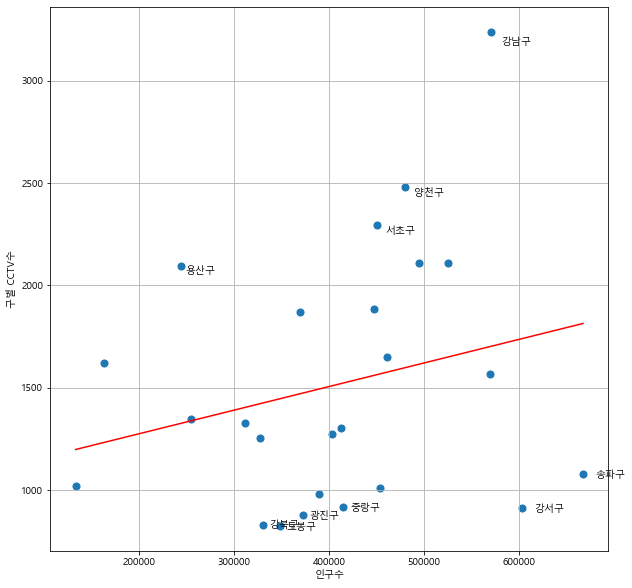

In [21]:
# plt.text(인구수,cctv대수,문자,fontsize)
# 산점도
plt.figure(figsize=(10,10))
plt.scatter(cctv_res['인구수'],cctv_res['소계'],s=50,label='cctv vs pop')
plt.plot(xs,ys,color='red',label='적정 cctv 대수') # 대표직선(회귀직선) 추가
for n in range(10) :
    plt.text(df_sort['인구수'][n]*1.02,df_sort['소계'][n]*0.98,
             df_sort.index[n],fontsize=10)
plt.xlabel('인구수')
plt.ylabel('구별 CCTV수')
plt.grid()
plt.show()